In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import scipy.stats as stats
import glob
mpl.rcParams['figure.dpi'] = 100
mpl.rcParams['figure.figsize'] = (8, 6)
%config InlineBackend.figure_format = 'retina'

In [3]:
path_to_results = '/home/ng213/pazy_code/pazy-aepw3-results/04_DeformedModal/'

In [42]:
ff_results = []
for skin in [True, False]:
    # SHARPy
#     path = path_to_results + '/sharpy_followerforce_skin{:g}/'.format(skin)
#     ff_results.append({'data': [np.loadtxt(path + 'mode_{:02g}.txt'.format(i_mode)) for i_mode in range(5)],
#                        'skin': skin,
#                        'line_style': {'marker': 'o', 'label': 'SHARPy w/o FF', 'ms': 2, 'color': 'k'}})
    # Michigan
    path = path_to_results + '/UMNAST_followerforce_skin{:g}/'.format(skin)
    ff_results.append({'data': [np.loadtxt(path + 'mode_{:02g}.txt'.format(i_mode)) for i_mode in range(5)],
                       'skin': skin,
                       'line_style': {'marker': 's', 'markevery': 5,
                                      'label': 'UM/NAST', 'color': 'k', 'ls':'none', 'ms':4, 'mfc':'none'}})
    
    if not skin:
        # Michigan FEM - NASTRAN
        path = path_to_results + '/UMNAST_parentFEM_followerforce_skin{:g}/'.format(skin)
        ff_results.append({'data': [np.loadtxt(path + 'mode_{:02g}.txt'.format(i_mode)) for i_mode in range(5)],
                           'skin': skin,
                           'line_style': {'label': 'NASTRAN', 'color': 'k', 'ls': 'none', 'marker':'+', 'ms':4}})
        
    path = path_to_results + '/sharpy_followerforce_LAS_FF_skin{:g}/'.format(skin)
    n_modes = len(glob.glob(path + '/*'))
    ff_results.append({'data': [np.loadtxt(path + 'mode_{:02g}.txt'.format(i_mode)) for i_mode in range(n_modes)],
                   'skin': skin,
                   'line_style': {'marker': 'o', 'label': 'SHARPy', 'ms': 4, 'color': 'k', 'ls':'none',
                                  'mfc': 'none'}})
    # MRM
    path = path_to_results + '/mrm_followerforce_skin{:g}_direct/'.format(skin)
    n_modes = len(glob.glob(path + '/*'))
    ff_results.append({'data': [np.loadtxt(path + 'mode_{:02g}.txt'.format(i_mode)) for i_mode in range(n_modes)],
                   'skin': skin,
                   'line_style': {'marker': '^', 'label': 'MRM', 'ms': 4, 'color': 'k', 'ls':'none',
                                  'mfc': 'none'}})

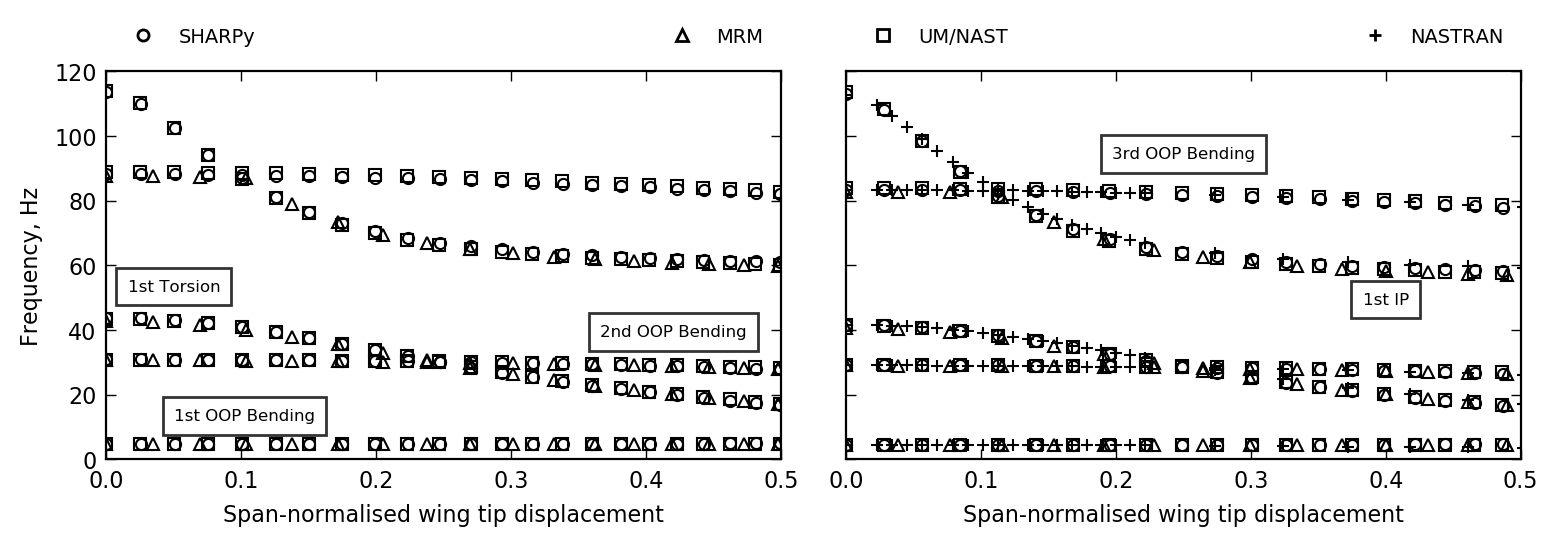

In [44]:
cm2in = 1/2.54
ar = 1.57
ar = 2.8
width_cm = 20

figsize = (width_cm * cm2in, width_cm / ar * cm2in)
fig, ax = plt.subplots(ncols=2, figsize=figsize, sharey=True)
lines = [[], []]
labels = [[], []]
for case in ff_results:
    for i_mode in range(len(case['data'])):
        if case['skin']:
            a = ax[0]
        else:
            a = ax[1]
            
        a.plot((case['data'][i_mode][:, 1]) / 0.55, case['data'][i_mode][:, -1] / 2 / np.pi, markeredgewidth=0.75, **case['line_style'])

    # legend
    if case['skin']:
        label_idx = 0
    else:
        label_idx = 1    
    lines[label_idx].append(mpl.lines.Line2D([0], [0], **case['line_style']))
    labels[label_idx].append(case['line_style']['label'])

# ax[0].legend(lines[0], labels[0], fontsize=8)
# ax[1].legend(lines[1], labels[1], fontsize=8)
ax[0].legend(lines[1][2:], labels[1][2:], frameon=False, bbox_to_anchor=(0,1.02,1,0.2), loc="lower left", ncol=2, mode='expand', fontsize=7)
ax[1].legend(lines[1][:2], labels[1][:2], frameon=False, bbox_to_anchor=(0,1.02,1,0.2), loc="lower left", ncol=2, mode='expand', fontsize=7)


# mode description
ax[0].text(0.05, 12, '1st OOP Bending', bbox={'facecolor': 'white', 'alpha': 0.8}, fontsize=6)
ax[0].text(0.42, 38, '2nd OOP Bending', bbox={'facecolor': 'white', 'alpha': 0.8}, fontsize=6, horizontalalignment='center')
ax[0].text(0.05, 52, '1st Torsion', bbox={'facecolor': 'white', 'alpha': 0.8}, fontsize=6, horizontalalignment='center')

ax[1].text(0.25, 93, '3rd OOP Bending', bbox={'facecolor': 'white', 'alpha': 0.8}, fontsize=6, horizontalalignment='center')
ax[1].text(0.4, 48, '1st IP', bbox={'facecolor': 'white', 'alpha': 0.8}, fontsize=6, horizontalalignment='center')

ax[0].set_ylabel('Frequency, Hz')
for a in ax:
    a.set_xlabel('Span-normalised wing tip displacement')
    
    a.set_ylim(0, 120)
    a.set_xlim(0, 0.5)
#     a.legend(fontsize=8)

    for item in ([a.title, a.xaxis.label, a.yaxis.label] +
             a.get_xticklabels() + a.get_yticklabels()):
        item.set_fontsize(8)
        
    a.xaxis.set_tick_params(which='major', direction='in', top='on', width=0.5)
    a.xaxis.set_tick_params(which='minor', direction='in', top='on', width=0.5)
    a.yaxis.set_tick_params(which='major', direction='in', right='on', width=0.5)
    a.yaxis.set_tick_params(which='minor', direction='in', right='on', width=0.5)
# ax[0].set_title('Skin on')
# ax[1].set_title('Skin off');
plt.tight_layout()
plt.savefig('../figures/03_DeformedModal.pdf')

In [45]:
mode_list = ['1st OOP bending', '2nd OOP bending', '1st torsion', '3rd OOP bending', '1st IP bending']

In [46]:
df_skin = {}
df_wo_skin = {}
for case in ff_results:
    if case['skin']:
        df = df_skin
    else:
        df = df_wo_skin
#     print(case['line_style']['label'])
    if case['line_style']['label'] == 'SHARPy':
        step = 1
    else:
        step = 1
    df[case['line_style']['label']] = [case['data'][i_mode][0, -1] / 2 / np.pi for i_mode in range(0, len(case['data']), step)]
        

In [48]:
print('\\ \t &\t UM/NAST \t&\t SHARPy \t&\t Rel Error \\\ ')
for i_mode in range(4):
    mode = []
    for k, v in df_skin.items():
        mode.append(v[i_mode])
#     print(mode)
    rel_error = np.abs(mode[0] - mode[1])/mode[0] * 100
    print('{:s}\t & \t {:.2f}\t & \t{:.2f} \t & \t {:.2f} \t \\\ '.format(mode_list[i_mode], *mode, rel_error))

\ 	 &	 UM/NAST 	&	 SHARPy 	&	 Rel Error \\ 
1st OOP bending	 & 	 4.68	 & 	4.69 	 & 	 4.67 	 \\ 
2nd OOP bending	 & 	 30.82	 & 	30.87 	 & 	 30.69 	 \\ 
1st torsion	 & 	 43.51	 & 	43.71 	 & 	 42.66 	 \\ 
3rd OOP bending	 & 	 88.82	 & 	88.19 	 & 	 87.64 	 \\ 


In [95]:
df_wo_skin

{'UM/NAST': [4.415087967956192,
  29.106467550719465,
  41.4441792478664,
  83.91541677508351,
  113.53208972650133],
 'NASTRAN': [4.4170159947833545,
  29.024673168816914,
  41.52519577957796,
  83.33973524569699,
  112.56053505088605],
 'SHARPy': [4.427151148224794,
  29.15233226154993,
  41.63252327663546,
  83.33778453463246,
  113.1097888714243]}

In [99]:
print('\\ \t&\t FEM\t &\t UM/NAST \t&\t SHARPy \t&\t Rel Error \\\ ')
for i_mode in range(5):
    mode = []
    for k, v in df_wo_skin.items():
        mode.append(v[i_mode])
#     print(mode)
    rel_error = np.abs(mode[0] - mode[2])/mode[0] * 100
    print('{:s}\t & \t {:.2f}\t & \t{:.2f} \t & \t{:.2f} \t & \t {:.2f} \t \\\ '.format(mode_list[i_mode], mode[1], mode[0], mode[2], rel_error))

\ 	&	 FEM	 &	 UM/NAST 	&	 SHARPy 	&	 Rel Error \\ 
1st OOP bending	 & 	 4.42	 & 	4.42 	 & 	4.43 	 & 	 0.27 	 \\ 
2nd OOP bending	 & 	 29.02	 & 	29.11 	 & 	29.15 	 & 	 0.16 	 \\ 
1st torsion	 & 	 41.53	 & 	41.44 	 & 	41.63 	 & 	 0.45 	 \\ 
3rd OOP bending	 & 	 83.34	 & 	83.92 	 & 	83.34 	 & 	 0.69 	 \\ 
1st IP bending	 & 	 112.56	 & 	113.53 	 & 	113.11 	 & 	 0.37 	 \\ 
